### Dataset Description:

The Bengaluru housing dataset contains various features related to house listings, helping analyze price trends. Key columns include:
- area_type → Type of area (e.g., Super Built-up, Plot, Carpet Area)
- availability → Status (Ready to move or launch date)
- location → Area where the property is situated
- size → Number of bedrooms (BHK)
- total_sqft → Total area of the house
- bath → Number of bathrooms
- balcony → Number of balconies
- price → Price of the property in lakhs
- price_per_sqft → Derived feature (price/total_sqft) to compare properties

This dataset helps identify pricing trends based on size, BHK, and amenities.

### Loading the Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = "Bengaluru_House_Data.csv.xls"

# Load the dataset
try:
    df = pd.read_csv(file_path)
except Exception as e:
    df = pd.read_excel(file_path) 

# Display the first few rows
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
df.describe

<bound method NDFrame.describe of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   

### Cleaning the Dataset
The dataset is cleaned by removing any rows with missing values. This is done using the following code:

In [11]:

# Convert 'size' to numerical format (extracting only the number of bedrooms)
df["size"] = df["size"].str.extract("(\d+)").astype(float)

def convert_sqft(value):
    try:
        if "-" in str(value):  # If range, take the average
            values = list(map(float, value.split("-")))
            return sum(values) / len(values)
        return float(value)  # Convert single values to float
    except:
        return None  # Return None for non-numeric values

df["total_sqft"] = df["total_sqft"].apply(convert_sqft)

# Drop rows where price is missing
df.dropna(subset=["price"], inplace=True)

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/m2/8_jd9vkj7g7_cy51bwwn9jxh0000gn/T/ipykernel_57286/23607666.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["size"] = df["size"].str.extract("(\d+)").astype(float)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


### Univariate Analysis

Now, let’s analyze individual variables:
We’ll check:
- Distribution of price (Histogram)
- Distribution of total_sqft (Histogram)
- Number of bedrooms (size) distribution

## Price Distribution of Houses

#### Steps Taken:
- Plotted a histogram with KDE (Kernel Density Estimation) for smooth visualization.
- Set the x-axis limit to remove extreme values and focus on typical price ranges.
- Used log scale if necessary to improve visibility of the distribution.

#### What This Plot Will Show:
- The most common price range for houses.
- Whether prices are skewed (e.g., most houses are cheap with a few expensive ones).
- Any potential outliers (unusually high-priced properties).

####  Analysis of the Price Distribution Plot
- Most houses are concentrated in the lower price range (0-200 lakhs).
- The distribution is right-skewed, meaning a few very expensive properties push the prices higher.
- By zooming in, we removed extreme values and focused on the majority of houses.


**This gives us a clear picture of affordability and helps in identifying outliers.**

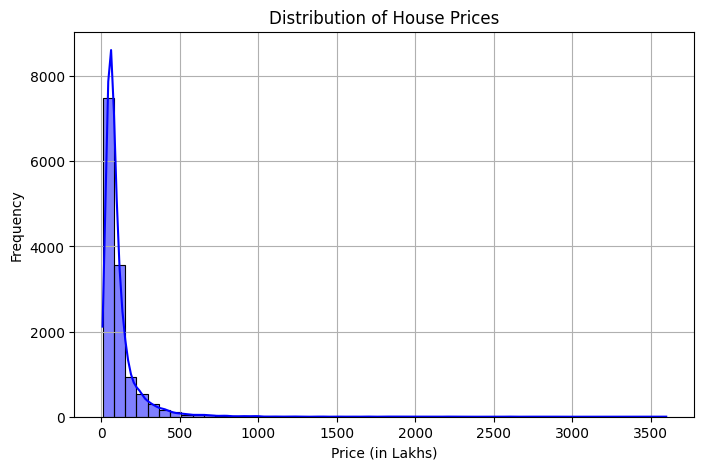

In [12]:
# Plot 1: Distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True, color="blue")
plt.xlabel("Price (in Lakhs)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.grid(True)
plt.show()

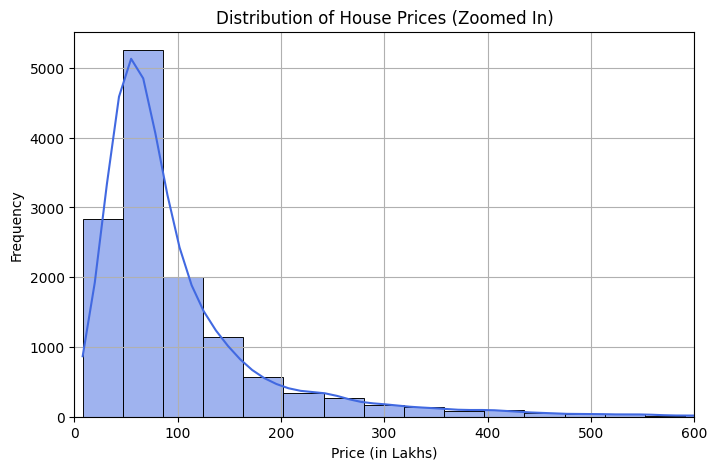

In [20]:
# Distribution of House Prices (Zoomed In)
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=60, kde=True, color="royalblue")

# Set X-axis limit to remove extreme high values
plt.xlim(0, 600) 

plt.xlabel("Price (in Lakhs)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices (Zoomed In)")
plt.grid(True)
plt.show()

### Plot 2: Distribution of Total Square Feet

#### Interpretation of the Plot:
- Most houses have an area between 900 to 1500 sqft.
- The distribution has a long right tail, indicating some large houses (luxury properties).
- There is a sharp peak around 1200 sqft, suggesting that this is a common house size.

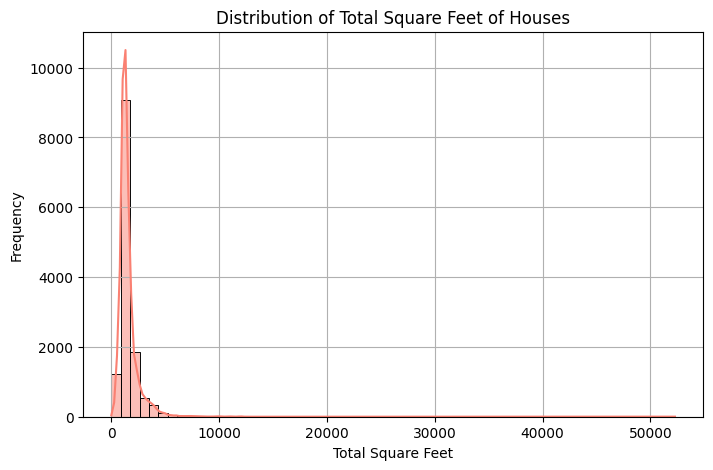

In [14]:
# Plot 2: Distribution of Total Square Feet
plt.figure(figsize=(8, 5))
sns.histplot(df["total_sqft"], bins=60, kde=True, color="salmon")
plt.xlabel("Total Square Feet")
plt.ylabel("Frequency")
plt.title("Distribution of Total Square Feet of Houses")
plt.grid(True)
plt.show()

### Plot 3: Distribution of Price Per Square Foot

This histogram shows the distribution of price per square foot (₹/sqft) of houses in Bengaluru.

Observations:
- Most houses have a price per square foot between ₹3,000 and ₹8,000.
- There are some outliers with extremely high prices, but they are less frequent.
- The distribution is right-skewed, meaning most houses are on the lower price range.


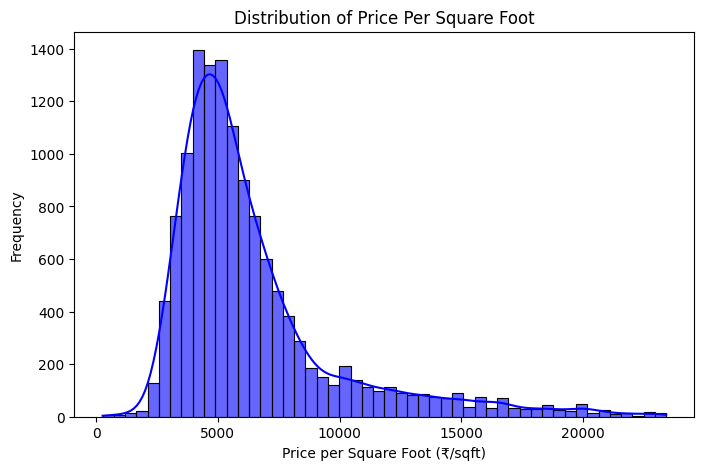

In [ ]:
# Plot 3: Price Per Square Foot Distribution

# Ensure 'price' is in lakhs and 'total_sqft' is numerical
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']

# Drop rows with missing or infinite values
df = df.dropna(subset=['price_per_sqft'])
df = df[df['price_per_sqft'] < df['price_per_sqft'].quantile(0.99)] 

# Plot
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True, color='blue', alpha=0.6)
plt.xlabel("Price per Square Foot (₹/sqft)")
plt.ylabel("Frequency")
plt.title("Distribution of Price Per Square Foot")
plt.show()

## Bivarent Ploting
### Plot 4: Price vs. Total Square Feet (Scatter Plot)
This scatter plot helps visualize the relationship between the total square footage of a house and its price.

Observations:
- There is a positive correlation: as square footage increases, price also tends to increase.
- However, there are some outliers where small houses have extremely high prices.
- Some large houses have relatively lower prices, possibly due to location or other factors.

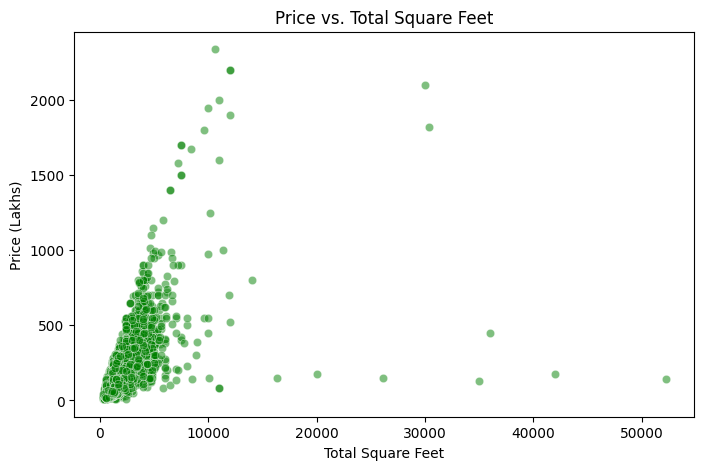

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_sqft'], y=df['price'], alpha=0.5, color='green')
plt.xlabel("Total Square Feet")
plt.ylabel("Price (Lakhs)")
plt.title("Price vs. Total Square Feet")
plt.show()

## Plot 5: Number of Bedrooms vs. Price (Box Plot)

This box plot helps understand how house prices vary with the number of bedrooms.

Observations:
- Median price increases with BHK count: Larger houses generally cost more.
- Price variation is huge within the same BHK category, especially for higher BHKs.
- There are outliers (extremely expensive houses with the same BHK count).


In [17]:
print(df.columns)
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else x)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'price_per_sqft'],
      dtype='object')


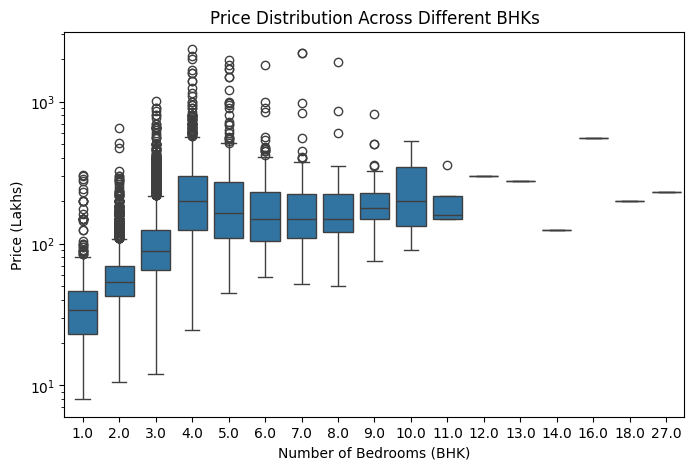

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['bhk'], y=df['price'])
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Price (Lakhs)")
plt.title("Price Distribution Across Different BHKs")
plt.yscale("log")  # Log scale to handle price variations
plt.show()

## Multivariate Analysis: Correlation Heatmap

A correlation heatmap helps us understand the relationships between different numerical variables.

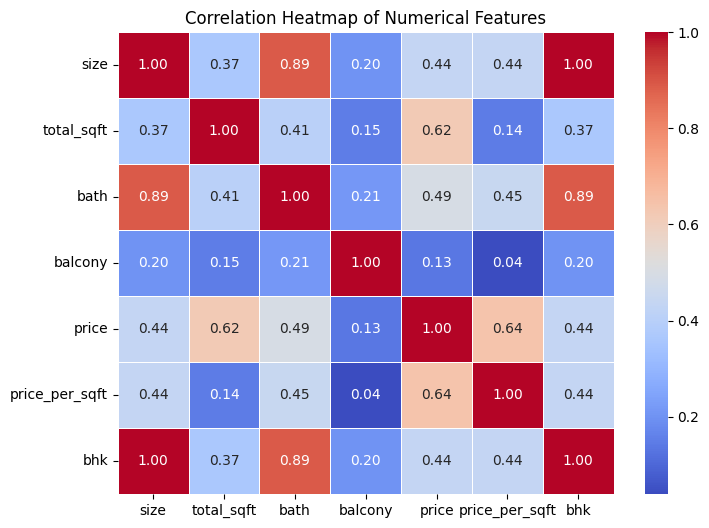

In [19]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#### What This Shows:
- Values range from -1 to 1
- 1 (or close to 1) → Strong positive relationship (e.g., price and total_sqft).
- -1 (or close to -1) → Strong negative relationship.
- 0 (or close to 0) → No significant relationship.
- This helps check if features like BHK, total_sqft, and price are strongly correlated.